## EDA  ESTADO DE CALIFORNIA (reviews-estados de Google Maps)

# Introducción

En este análisis exploratorio de datos (EDA), se analizarán las reseñas de Google Maps del estado de California para comprender mejor las opiniones y percepciones de los usuarios sobre los establecimientos turísticos y de ocio. Este estudio tiene como objetivo identificar las tendencias y patrones en las calificaciones y comentarios, así como destacar los aspectos más valorados por los clientes y las áreas que requieren mejoras.

In [6]:
#Importación de librerías
import ast
import json
import pandas as pd
import numpy as np
import jsonlines
import matplotlib as plt
import matplotlib.pyplot as plt
import os
import gc
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import warnings

In [3]:
#Carga de dataset
df = pd.read_parquet(r"E:\Repositorios y bases de datos\Henry DS\_PROYECTO FINAL\reviews.parquet")

In [45]:
#Visualización del data frame
df

,user_id,name,time,rating,text,pics,resp,gmap_id
0,108991152262655788985,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,111290322219796215751,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,112640357449611959087,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,117440349723823658676,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,100580770836123539210,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
...,...,...,...,...,...,...,...,...
2549995,111342337087018931578,Byunguk Kim,1573362674409,5,None,None,None,0x80c2bea30829f279:0x39aa953ee93734ed
2549996,108081820251273699976,Ceveda Craytonhooks,1580608853411,5,Beautiful salon. The staff and atmosphere were...,None,None,0x8094675073616747:0x9f935a9b9046a9ba
2549997,117591383135333249676,Natacha Thompson,1528597806165,5,Flo is a great beautician. She is very patie...,[{'url': ['https://lh5.googleusercontent.com/p...,{'text': 'Thank you! It was my pleasure to gi...,0x8094675073616747:0x9f935a9b9046a9ba
2549998,112426610655792883265,Eleanor Aikins,1551203379295,5,I Been going to have a variety of hair style a...,None,None,0x8094675073616747:0x9f935a9b9046a9ba


# Nulos

In [46]:
df.isnull().sum()

user_id          0
name             0
time             0
rating           0
text       1103898
pics       2456165
resp       2317095
gmap_id          0
dtype: int64

In [47]:
print(df[df.isnull().any(axis=1)])

                       user_id                 name           time  rating  \
0        108991152262655788985              Song Ro  1609909927056       5   
1        111290322219796215751          Rafa Robles  1612849648663       5   
2        112640357449611959087            David Han  1583643882296       4   
3        117440349723823658676          Anthony Kim  1551938216355       5   
4        100580770836123539210        Mario Marzouk  1494910901933       5   
...                        ...                  ...            ...     ...   
2549994  112272076740532470713          Krish Munot  1514053532088       4   
2549995  111342337087018931578          Byunguk Kim  1573362674409       5   
2549996  108081820251273699976  Ceveda Craytonhooks  1580608853411       5   
2549998  112426610655792883265       Eleanor Aikins  1551203379295       5   
2549999  112219943666423225464            Thai Love  1553880485978       5   

                                                      text  pic

## Vacíos

In [7]:
warnings.filterwarnings('ignore')

In [8]:
def is_empty(x):
    if x is None:
        return True
    elif isinstance(x, (str, list, dict, set, np.ndarray)) and len(x) == 0:
        return True
    return False

# Aplicar la función al DataFrame
empty_mask = df.applymap(is_empty)

# Ver el número de valores vacíos en cada columna
print("\nValores vacíos por columna:")
print(empty_mask.sum())

# Ver las filas que contienen valores vacíos
print("\nFilas con valores vacíos:")
print(df[empty_mask.any(axis=1)])


Valores vacíos por columna:
user_id          0
name             0
time             0
rating           0
text       1103898
pics       2456165
resp       2317095
gmap_id          0
dtype: int64

Filas con valores vacíos:
                       user_id                 name           time  rating  \
0        108991152262655788985              Song Ro  1609909927056       5   
1        111290322219796215751          Rafa Robles  1612849648663       5   
2        112640357449611959087            David Han  1583643882296       4   
3        117440349723823658676          Anthony Kim  1551938216355       5   
4        100580770836123539210        Mario Marzouk  1494910901933       5   
...                        ...                  ...            ...     ...   
2549994  112272076740532470713          Krish Munot  1514053532088       4   
2549995  111342337087018931578          Byunguk Kim  1573362674409       5   
2549996  108081820251273699976  Ceveda Craytonhooks  1580608853411       5   

# Tipos de datos

In [49]:
#Evaluamos con qué tipo de datos contamos. Nos interesa buscar especialmente cadenas de texto y números enteros
print(df.dtypes)

user_id    object
name       object
time        int64
rating      int64
text       object
pics       object
resp       object
gmap_id    object
dtype: object


# Metadatos

In [50]:
#Las siguientes celdas muestras información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550000 entries, 0 to 2549999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 155.6+ MB


In [51]:
#imprimir las dimensiones del data frame
print(df.shape)

(2550000, 8)


In [52]:
#Visualización de los nombres de las columnas
print(df.columns)

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')


In [53]:
#Datos estadísticos
print(df.describe())       #Se procederá en el ETL a transformar la notación

               time        rating
count  2.550000e+06  2.550000e+06
mean   1.551568e+12  4.314333e+00
std    4.658100e+10  1.127482e+00
min    6.626016e+11  1.000000e+00
25%    1.522986e+12  4.000000e+00
50%    1.555299e+12  5.000000e+00
75%    1.582410e+12  5.000000e+00
max    1.631149e+12  5.000000e+00


In [54]:
#Muestra de valores únicos de ID de usuarios
unique_misc = df['user_id'].unique()
print(len(unique_misc))


949922


In [56]:
#Muestra de valores únicos de ID de locación
unique_misc = df['gmap_id'].unique()
print(len(unique_misc))

71356


# Duplicados

In [57]:
#Crear una lista para almacenar las columnas que causaron problemas
columnas_problema = []

def check_duplicates(dataframe):
    global columnas_problema
    
    # Crear una lista para almacenar las columnas que se pueden procesar
    columnas_procesables = []

    for col in dataframe.columns:
        try:
            # Intentar acceder a los datos de la columna
            df[columnas_procesables].append(col)
        except Exception as e:
            columnas_problema.append(col)
            

    # Crear un DataFrame solo con las columnas procesables
    df_procesable = dataframe[columnas_procesables]
    
    # Verificar duplicados en el DataFrame procesable
    try:
        duplicados = df_procesable.duplicated()
        num_duplicados = duplicados.sum()
        if num_duplicados > 0:
            print(f"Número de filas duplicadas en el DataFrame: {num_duplicados}")
            print("Filas duplicadas:")
            print(dataframe[duplicados])
        else:
            print("No hay filas duplicadas en el DataFrame.")
    except Exception as e:
        print(f"Error al verificar duplicados en el DataFrame procesable: {e}")

# Verificar duplicados en el DataFrame
check_duplicates(df)

# Listar las columnas problemáticas
if columnas_problema:
    print("Columnas que no pueden ser accedidas:")
    for col in columnas_problema:
        print(col)
        

No hay filas duplicadas en el DataFrame.
Columnas que no pueden ser accedidas:
user_id
name
time
rating
text
pics
resp
gmap_id


# Outliers

In [58]:
# Función para calcular outliers usando el rango intercuartílico (IQR)
def calculate_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Aplicar la función a la columna `rating`
rating_outliers = calculate_outliers_iqr(df['rating'])
print("Outliers en rating:")
print(rating_outliers)

Outliers en rating:
7          1
14         1
20         1
44         1
62         1
          ..
2549978    1
2549980    1
2549981    1
2549984    1
2549986    1
Name: rating, Length: 226590, dtype: int64


In [59]:
# Aplicar la función a la columna `time`
time_outliers = calculate_outliers_iqr(df['time'])
print("Outliers en time:")
print(time_outliers)


Outliers en time:
160        1397679104451
184        1366427331627
187        1366427331627
263        1324144190767
353        1387157158847
               ...      
2549332    1327098005823
2549333    1326622532061
2549646    1319651379908
2549753    1293085127376
2549970    1351005640089
Name: time, Length: 34115, dtype: int64


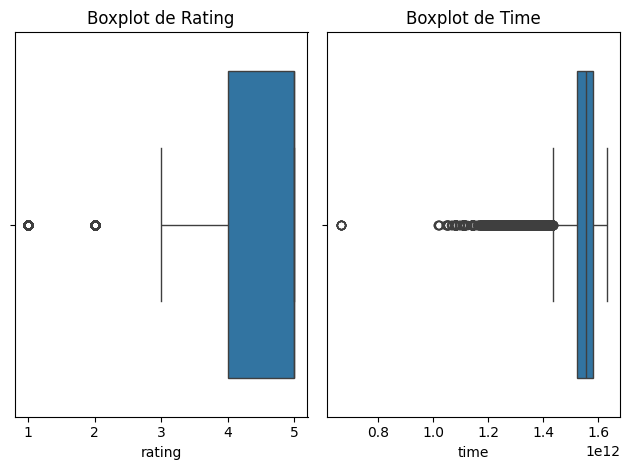

In [60]:
# Boxplot para la columna 'rating'
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='rating')
plt.title('Boxplot de Rating')

# Boxplot para la columna 'time'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='time')
plt.title('Boxplot de Time')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Boxplot de Rating:

La escala va de 1 a 5, lo que sugiere que podría ser una escala de calificación típica.
La mediana (línea horizontal dentro de la caja) está cerca de 4.
La caja, que representa el rango intercuartílico (IQR), se extiende aproximadamente de 3.5 a 5.
Hay algunos valores atípicos (outliers) en el extremo inferior, representados por círculos cerca de 1 y 2.
La distribución parece estar sesgada hacia los valores más altos, ya que la caja está más comprimida en la parte superior.


Boxplot de Time:

La mediana está cerca de 1.4.
La caja es muy estrecha, lo que indica que el 50% central de los datos está muy concentrado.
Hay una gran cantidad de valores atípicos en el extremo inferior, representados por múltiples círculos superpuestos.
La distribución parece estar muy sesgada, con la mayoría de los datos concentrados en valores más altos y una "cola" larga hacia los valores más bajos.

Las calificaciones tienden a ser altas, con la mayoría entre 3.5 y 5, pero con algunos valores bajos atípicos.
Los tiempos están muy concentrados alrededor de un valor alto, pero hay muchos casos atípicos con tiempos significativamente menores.

# Distribución del rating

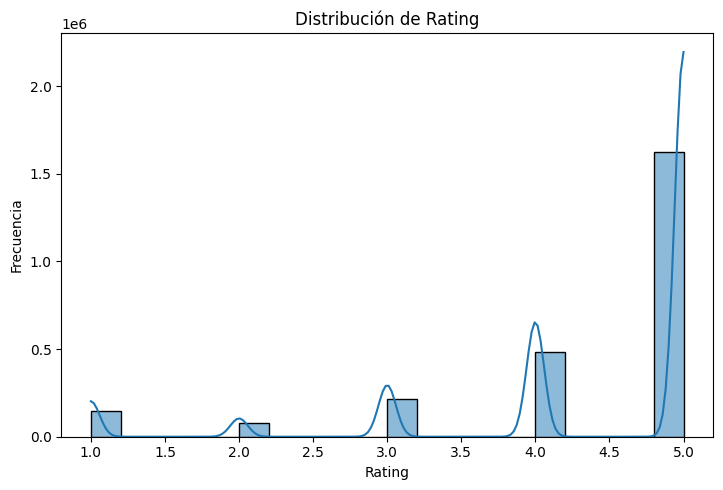

In [61]:
# Crear una figura con dos subgráficas
plt.figure(figsize=(14, 5))

# Histograma y gráfico de densidad para la columna 'rating'
plt.subplot(1, 2, 1)
sns.histplot(df['rating'], kde=True, bins=20)
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')


# Mostrar los gráficos
plt.tight_layout()
plt.show()


Hay dos picos principales, uno en 5.0 y otro menor en 4.0, lo que sugiere una distribución bimodal.
El rating de 5.0 tiene la frecuencia más alta, superando los 2 millones de ocurrencias.
Hay un pico secundario en 4.0, con alrededor de 0.5 millones de ocurrencias.
Hay frecuencias relativamente bajas para los ratings de 1.0, 2.0 y 3.0, aunque 1.0 tiene una frecuencia ligeramente mayor que 2.0 y 3.0.
La distribución está fuertemente sesgada hacia los ratings altos (4 y 5).
Hay muy pocas calificaciones entre los valores enteros, lo que sugiere que los usuarios tienden a dar calificaciones enteras.
La gran diferencia entre las frecuencias de 5.0 y las demás sugiere una tendencia a dar calificaciones extremadamente positivas. (Polarización)

Esta distribución es típica en sistemas de calificación online, donde los usuarios tienden a dar calificaciones muy altas o muy bajas, con menos calificaciones intermedias.

# Nube de palabras de reseñas

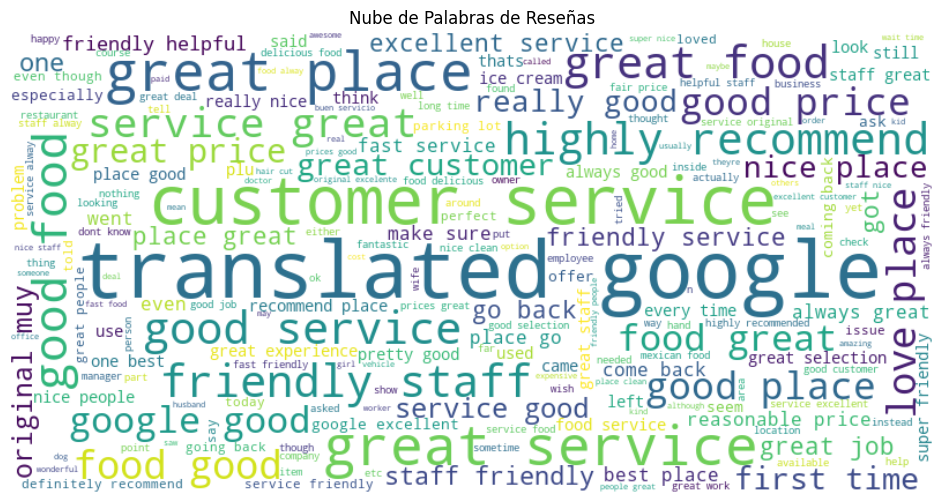

In [4]:
# Función para limpiar el texto
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar puntuación
    words = word_tokenize(text)  # Tokenizar
    stop_words = set(stopwords.words('english'))  # Stopwords en inglés
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    return ' '.join(words)

# Unir todas las reseñas en una sola cadena de texto
all_text = ' '.join(df['text'].dropna().apply(clean_text))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.title('Nube de Palabras de Reseñas')
plt.show()

Palabras más prominentes:
"great" (grande, excelente): Es la palabra más destacada, apareciendo en varios tamaños y colores.
"food" (comida): Muy prominente, sugiriendo que las reseñas son mayormente sobre restaurantes.
"service" (servicio): También muy destacada, indicando la importancia de la atención al cliente.
"place" (lugar): Bastante visible, posiblemente refiriéndose al establecimiento en general.
"google": Notablemente grande, ya que se trata de reseñas de Google Maps.

Otras palabras frecuentes:
"friendly" (amigable)
"staff" (personal)
"good" (bueno)
"recommend" (recomendar)
"translated" (traducido): Interesante, podría indicar que algunas reseñas fueron traducidas automáticamente.
"customer" (cliente)
"price" (precio)

Sentimientos expresados:
Predominantemente positivos: "love", "excellent", "best", "helpful", "nice".
Algunas palabras neutras: "first time", "back" (posiblemente "come back" o "went back").
No se observan palabras negativas prominentes.

Aspectos del servicio mencionados:
"staff" y "friendly" sugieren un enfoque en el trato del personal.
"price" indica que el costo es un factor importante.
"experience" sugiere que los clientes evalúan la experiencia general.

Frecuencia y tiempo:
"always" y "every time" indican consistencia en la experiencia.
"first time" sugiere que hay reseñas de clientes nuevos.

Acción y recomendación:
"recommend" y "highly recommend" son prominentes, indicando que muchos clientes recomiendan el lugar o servicio.
"coming back" sugiere la intención de regresar, lo cual es positivo.

Esta nube de palabras sugiere que las reseñas son generalmente muy positivas, con un fuerte énfasis en la calidad de la comida, el servicio y la experiencia general. 

# Número de reseñas por usuario

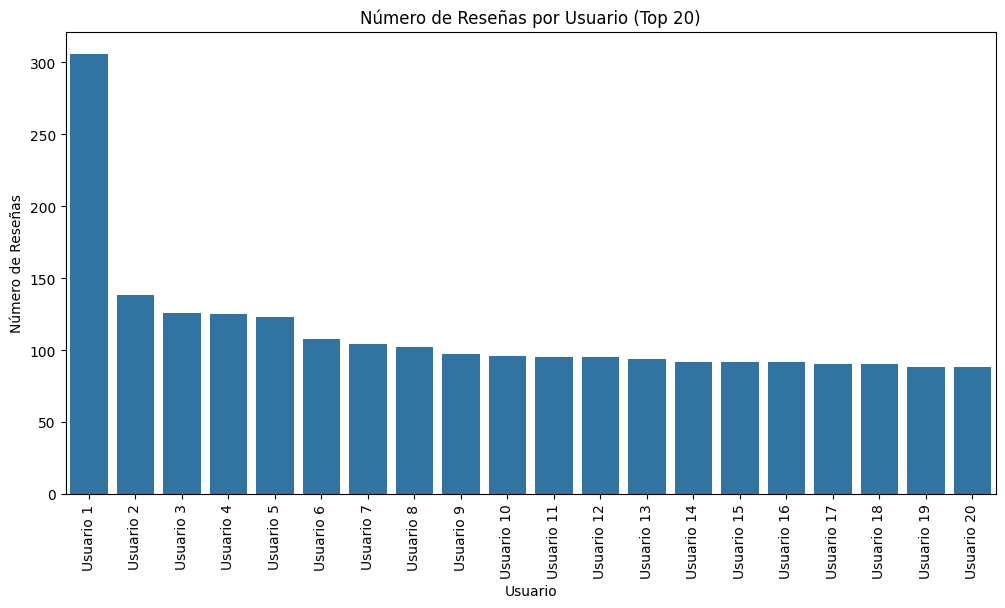

In [63]:
# Contar el número de reseñas por usuario y seleccionar los 20 principales
review_counts = df['user_id'].value_counts().head(20)

# Crear un gráfico de barras con etiquetas genéricas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=review_counts.index, y=review_counts.values, order=review_counts.index)

# Configurar el gráfico
ax.set_title('Número de Reseñas por Usuario (Top 20)')
ax.set_xlabel('Usuario')
ax.set_ylabel('Número de Reseñas')

# Reemplazar los nombres de usuarios con etiquetas genéricas
ax.set_xticks(range(len(review_counts)))
ax.set_xticklabels([f'Usuario {i+1}' for i in range(len(review_counts))], rotation=90)

plt.show()

Hay una clara tendencia decreciente de izquierda a derecha.
El Usuario 1 destaca significativamente con más de 300 reseñas.
Después del Usuario 1, hay una caída pronunciada en el número de reseñas.


Detalles específicos:
Usuario 1: Aproximadamente 310 reseñas.
Usuario 2: Alrededor de 140 reseñas.
Usuarios 3-5: Tienen entre 120-130 reseñas cada uno.
Usuarios 6-20: Muestran una disminución gradual de aproximadamente 110 a 90 reseñas.

El Usuario 1 tiene más del doble de reseñas que el Usuario 2.
Hay una brecha significativa entre el Usuario 1 y el resto.
A partir del Usuario 6, la disminución en el número de reseñas es más gradual y menos pronunciada.

Existe un usuario muy activo (Usuario 1) que contribuye desproporcionadamente al número total de reseñas.
Los siguientes 19 usuarios más activos tienen un nivel de actividad más similar entre sí.
Incluso dentro del top 20, hay una diferencia notable entre el usuario más activo y los demás.

El gráfico sugiere una distribución desigual en la actividad de los usuarios, con un usuario particularmente prolífico en la escritura de reseñas.

en qué período de tiempo??????????????????

# Promedio de calificaciones por mes

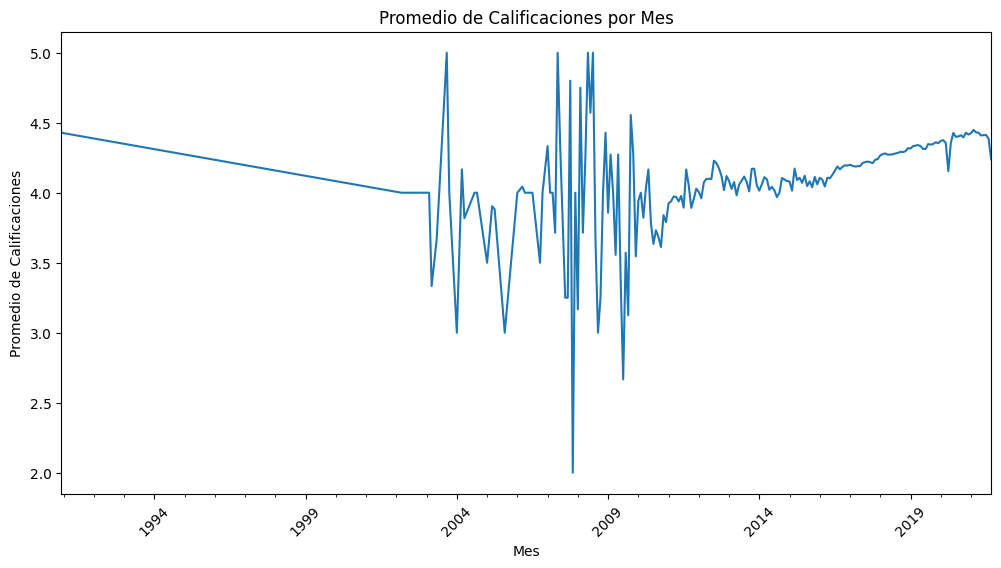

In [64]:
# Convertir el tiempo en formato de fecha
df['date'] = pd.to_datetime(df['time'], unit='ms')

# Extraer año y mes
df['year_month'] = df['date'].dt.to_period('M')

# Calcular el promedio de calificaciones por mes
monthly_ratings = df.groupby('year_month')['rating'].mean()

# Graficar
plt.figure(figsize=(12, 6))
monthly_ratings.plot(kind='line')
plt.title('Promedio de Calificaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Calificaciones')
plt.xticks(rotation=45)
plt.show()

revisar volatilidad !!!!!!!!!

A largo plazo, se observa una ligera tendencia al alza en las calificaciones promedio.
Hay una gran variabilidad en los datos, especialmente en el período entre 2000 y 2010, donde se ven fluctuaciones extremas.

Inicio de los 90s hasta finales de los 90s: Aumento constante y suave.
Alrededor del 2000: Caída brusca seguida de alta volatilidad.
2010 en adelante: Estabilización relativa con un aumento gradual.

Los promedios parecen oscilar principalmente entre 3.0 y 5.0.
Se observan algunos picos notables que llegan a 5.0, así como caídas pronunciadas, con el punto más bajo cerca de 2.75.
En los últimos años, parece haber una tendencia más estable y ligeramente ascendente.
Hay algunos puntos de datos que parecen ser valores atípicos, especialmente durante el período de alta volatilidad.

Este gráfico sugiere que ha habido cambios significativos en el sistema de calificación o en los factores que afectan las calificaciones a lo largo del tiempo.

# Conclusión

La mayoría de las calificaciones se agrupan en los valores extremos, con una clara predominancia de calificaciones de 5.0 (más de 2 millones de ocurrencias) y un pico secundario en 4.0 (alrededor de 0.5 millones).
Las calificaciones intermedias (1.0, 2.0 y 3.0) son menos frecuentes, con una notable inclinación hacia calificaciones muy altas (4.0 y 5.0). Esto sugiere que los usuarios tienden a dar calificaciones extremadamente positivas o muy negativas.

A lo largo del tiempo, se observa una ligera tendencia al alza en las calificaciones promedio, a pesar de la alta variabilidad y algunos picos y caídas pronunciadas, especialmente entre 2000 y 2010.
Esto podría indicar una mejora en la calidad del servicio o una mayor satisfacción de los usuarios en años recientes.

Existe un usuario altamente activo (Usuario 1) que contribuye con más de 300 reseñas, lo que representa una proporción significativa del total de reseñas.
Los siguientes usuarios más activos tienen una disminución pronunciada en el número de reseñas, con el Usuario 2 aportando alrededor de 140 reseñas y los siguientes 3-5 usuarios con entre 120-130 reseñas cada uno.
A partir del Usuario 6, la actividad se distribuye más uniformemente, aunque sigue existiendo una brecha significativa entre el Usuario 1 y el resto.

La distribución de reseñas sugiere que un pequeño grupo de usuarios contribuye de manera desproporcionada al número total de reseñas, mientras que la mayoría de los usuarios contribuye de manera menos frecuente.

En cuanto al análisis de sentimientos, las palabras más frecuentes en las reseñas son altamente positivas, con términos como "great", "food", "service" y "recommend" dominando el contenido.
Los sentimientos expresados son principalmente positivos, con pocas palabras negativas prominentes.

Las reseñas destacan la calidad de la comida y el servicio, con palabras como "friendly", "staff", "price" y "experience" apareciendo con frecuencia.
La mayoría de las reseñas parecen centrarse en aspectos positivos de la experiencia, con un enfoque en la calidad del servicio y la comida, y una tendencia a recomendar el lugar.

La variabilidad en las calificaciones y en el número de reseñas a lo largo del tiempo sugiere cambios en la percepción de los usuarios o en la calidad del servicio.
Los datos indican una estabilización en las calificaciones en años recientes después de un período de alta volatilidad, con una ligera tendencia ascendente.

Se observan picos notables y caídas en las calificaciones, lo que podría reflejar cambios en la oferta de servicios, eventos significativos o actualizaciones en el sistema de calificación.


Calidad General: Las reseñas de Google Maps en California son en su mayoría muy positivas, con una fuerte inclinación hacia calificaciones de 4.0 y 5.0.
Contribución Desproporcionada: Un número relativamente pequeño de usuarios contribuye con la mayoría de las reseñas, mientras que la mayoría de los usuarios participa menos activamente.
Tendencias Temporales: Hay una ligera tendencia al alza en las calificaciones promedio a lo largo del tiempo, con una gran variabilidad en los datos.
Se espera que estos hallazgos puedan ser útiles para nuestro cliente para mejorar estrategias de marketing, optimizar la oferta de servicios y comprender mejor las expectativas y comportamientos de los usuarios en California.